# Using HOG and SVM to build a face detector with Sliding Window Approach.

### 1. Training Phase


In [46]:
#importing modules
import numpy as np
import cv2
import os
import glob
from PIL import Image
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sys
import itertools as it
#neccessary import for hog feature
from skimage.feature import hog

In [2]:
#using cropped faces images in positive dataset path
positive_dataset_path = "D:\\GithubBranch\\ObjectDetection\\HOG_SVM\\data\\Positive"
#using cropped flowers images in negative dataset path
negative_dataset_path = "D:\\GithubBranch\\ObjectDetection\\HOG_SVM\\data\\Negative"

Positive Image sample with Filename 43_0_3_20170119180619699.jpg.chip.jpg


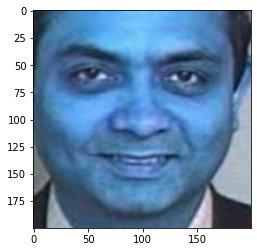

Negative Image sample with Filename 0001.png


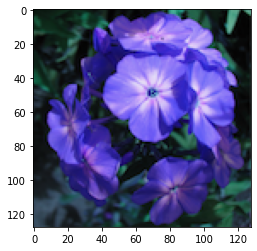

Positive Image sample with Filename 43_0_3_20170119181057511.jpg.chip.jpg


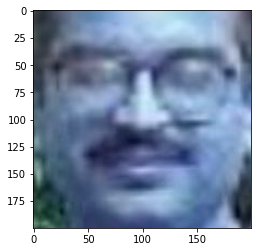

Negative Image sample with Filename 0002.png


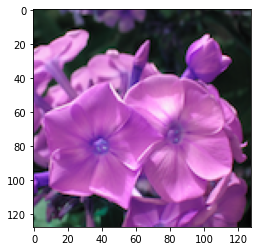

Positive Image sample with Filename 43_0_3_20170119181404861.jpg.chip.jpg


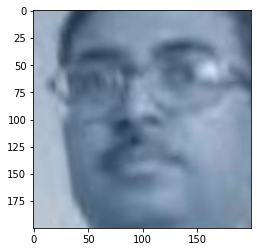

Negative Image sample with Filename 0003.png


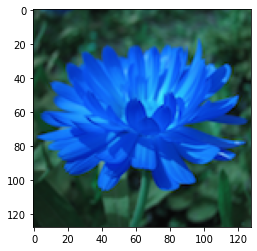

Positive Image sample with Filename 43_0_3_20170119200911708.jpg.chip.jpg


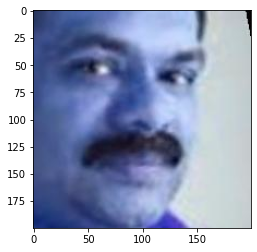

Negative Image sample with Filename 0004.png


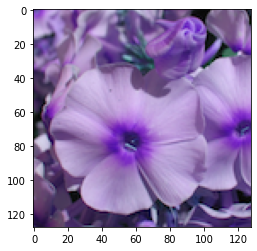

Positive Image sample with Filename 43_0_3_20170119202025045.jpg.chip.jpg


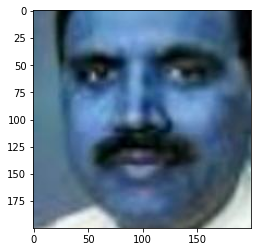

Negative Image sample with Filename 0005.png


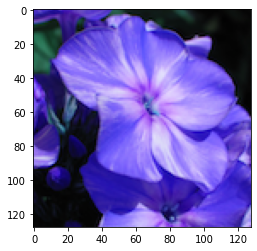

In [3]:
#plotting few positive and negative image samples from the dataset
count = 0
for file1, file2 in zip(glob.glob(positive_dataset_path+"\*"),glob.glob(negative_dataset_path+"\*")):
    if count<5:
        #plotting positive image
        positive_image_name = file1.split("\\")[-1]
        print("Positive Image sample with Filename {0}".format(positive_image_name))
        plt.imshow(cv2.imread(file1))
        plt.show()
        #plotting negative image
        negative_image_name = file2.split("\\")[-1]
        print("Negative Image sample with Filename {0}".format(negative_image_name))
        plt.imshow(cv2.imread(file2))
        plt.show()
        #incrementing the counter
        count+=1
        
        

In [4]:
"""
The hog() function takes 6 parameters as input:

image: The target image you want to apply HOG feature extraction.
orientations: Number of bins in the histogram we want to create, the original research paper used 9 bins so we will pass 9 as orientations.
pixels_per_cell: Determines the size of the cell,8x8 here.
cells_per_block: Number of cells per block, will be 2x2..
visualize: A boolean whether to return the image of the HOG, we set it to True so we can show the image.
multichannel: We set it to True to tell the function that the last dimension is considered as a color channel, instead of spatial.

"""
"""
Notable features of HOG
1. HOG focuses on the structre of the object i.e it extracts the information of the edges magnitude as well as orientation of the edges.
2. It uses a detection window of 64*128 pixels hence the image is first converted to the aforementioned shape.
3. The image is further divided into sub regions which are then used to calculate gradient and orientation for each sub block.

Sub Regions are divided into 8*16 cells into blocks with 0.5 overlap. total blocks = 105
The 64 gradient vectors of each block(8*8 pixel cell) are put into 9 bin histogram.

"""


#defining parameters for HOG feature extraction
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)
threshold = 0.4

In [5]:


#computing hog features and appending labels
# we will label positive samples as 1 and negative as 0

#creating list for storing hog features from positive and negative samples along with labels
features = []
labels = []

# iterating through positive and negative samples.
for file1, file2 in zip(glob.glob(positive_dataset_path+"\*"),glob.glob(negative_dataset_path+"\*")):
    positive_sample = Image.open(file1)
    negative_sample = Image.open(file2)
    #resizing image into 64*128
    positive_sample = positive_sample.resize((64,128))
    negative_sample = negative_sample.resize((64,128))
    #converting them to grayscale
    positive_sample = positive_sample.convert('L')
    negative_sample = negative_sample.convert('L')
    #calculating hog feature
    pos_hog_feature = hog(positive_sample,orientations,pixels_per_cell,cells_per_block, block_norm = 'L2',feature_vector = True)
    neg_hog_feature = hog(negative_sample, orientations, pixels_per_cell,cells_per_block, block_norm='L2', feature_vector = True)
    #appending the hog feature and their corresp labels into the list
    features.append(pos_hog_feature)
    labels.append(1)
    features.append(neg_hog_feature)
    labels.append(0)

In [30]:
#printing the shape of features and labels array
print(np.shape(features))
print(np.shape(labels))

(1626, 3780)
(1626,)


In [31]:
#splitting the data into train and test split
X_train,X_test,ytrain,ytest = train_test_split(features, labels,train_size=0.7, random_state=42)

In [32]:
print(np.shape(X_test))
print(np.shape(X_train))

(488, 3780)
(1138, 3780)


In [33]:
#Scratch
# #converting labels to one-hot encoded
# class_labels = tf.keras.utils.to_categorical(labels,2)
# print(np.shape(class_labels))
#flattening the feature vectors
#X_train = np.reshape(X_train, np.shape(X_train)[0]*np.shape(X_train)[1])
#X_test = np.reshape(X_test, np.shape(X_test)[0]*np.shape(X_test)[1])

In [34]:
#printing the shape of train and test features and labels
print("Shape of Train features is ",np.shape(X_train))
print("Shape of Train Labels is ", np.shape(ytrain))
print("Shape of Test features is",np.shape(X_test))
print("Shape of Test labels is",np.shape(ytest))


Shape of Train features is  (1138, 3780)
Shape of Train Labels is  (1138,)
Shape of Test features is (488, 3780)
Shape of Test labels is (488,)


In [41]:
#fitting a SVC
svc= SVC(gamma=0.001, C=100.)
svc.fit(X_train,ytrain)

SVC(C=100.0, gamma=0.001)

In [85]:
#evaluating on test data
predictions = svc.predict(X_test)

In [86]:
print(predictions)

[1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0
 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0
 0 0 1 1 1 0 1]


In [43]:
#generating classification_report
from sklearn.metrics import classification_report
print(classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       241

    accuracy                           1.00       488
   macro avg       1.00      1.00      1.00       488
weighted avg       1.00      1.00      1.00       488



In [44]:
#saving the model for later usage.
import pickle
filename = 'SVM_Model.pkl'
pickle.dump(svc, open(filename, 'wb'))


### 2. Inference Stage

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 110 , 0


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 30 , 60


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 110 , 70


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 110 , 80


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 120 , 80


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 120 , 90


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 100 , 160


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 170


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 100 , 170


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 180


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 0 , 0


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 0 , 10


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 10


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 20


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 30


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 40


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 30 , 110


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 10


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 20 , 10


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 10 , 20


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 20 , 20


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 10 , 30


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

detection confidence score:  [1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416]


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 110 , 20


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 90 , 30


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 40 , 40


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 50 , 40


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 90 , 40


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 40 , 50


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 90 , 50


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 110 , 90


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 30 , 110


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 90 , 140


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 50 , 160


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 100 , 190


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 0 , 200


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 100 , 200


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 120 , 200


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 120 , 210


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 120 , 220


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 120 , 230


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 120 , 240


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 0


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 50 , 10


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 50 , 20


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 30 , 60


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 30 , 70


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 30 , 80


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 100


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 110


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 10


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 20


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 30


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 40


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

detection confidence score:  [1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416]


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 150


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 70 , 210


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 70 , 220


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 70 , 230


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

detection confidence score:  [1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416]


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)


Face detected at 10 , 0


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 40 , 10


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 0 , 50


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 30 , 70


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 30 , 80


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 90 , 150


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 40 , 160


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 90 , 160


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 40 , 170


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 90 , 170


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 40 , 180


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 190


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 110 , 210


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 60 , 240


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 10 , 40


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 0 , 50


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 0 , 60


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 50 , 70


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 50 , 80


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

Face detected at 50 , 90


<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = skimage.color.rgb2gray(patch)
<ipython-input-115-3a88a054bda7>:40: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  patch = s

detection confidence score:  [1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416, 1.8650378841623416]


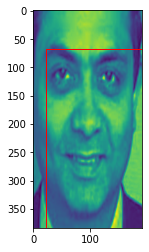

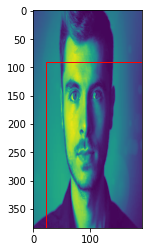

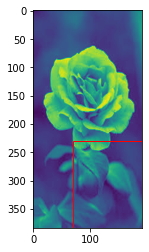

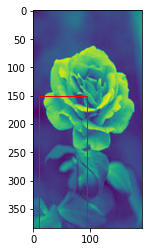

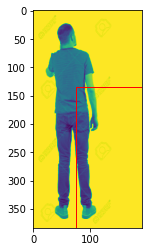

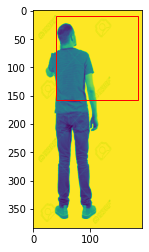

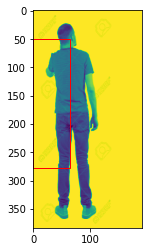

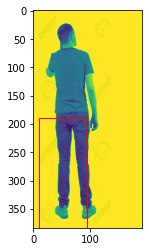

In [115]:
#neccessary imports 
import matplotlib.pyplot as plt
from skimage.transform import pyramid_gaussian
import skimage
from imutils.object_detection import non_max_suppression
import matplotlib.patches as patches
#Sliding window helper function
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    #iterate through rows and columns
    for y in range(0, image.shape[0], stepSize):# this line and the line below actually defines the sliding part and loops over the x and y coordinates
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y: y + windowSize[1], x:x + windowSize[0]])


#loading the pickle model
#svc_model = pickle.load(open(r'D:\GithubBranch\ObjectDetection\HOG_SVM\trained_model\SVM_Model.pkl', 'rb'))
#print("Model loaded successfully!")
test_image_path = "D:\GithubBranch\ObjectDetection\HOG_SVM\data\Testing_Data"
for test_file in glob.glob(test_image_path+"\*"):
    #reading the image
    test_image = Image.open(test_file)
    test_image = test_image.resize((192,384))
    test_image = test_image.convert('L')
    #defining the size of sliding window as it has to be same has the fitted features shape during training
    window_shape = (64,128)
    scale = 1.5
    pyramid_level = 0
    bbox_detections = []
    #applying sliing window over each pyramid layer 
    for img in pyramid_gaussian(test_image, downscale=scale):
        for(r,c, patch) in sliding_window(img, stepSize=10, windowSize = window_shape):
            #if window is not of our desired_shape then pass
            if(np.shape(patch)[0]==128 and np.shape(patch)[1]==64):
                #converting patch to grayscale as model was fitted on it
                patch = skimage.color.rgb2gray(patch)
                #patch =  cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
                #calculating hog feature
                feature = hog(patch, orientations, pixels_per_cell,cells_per_block, block_norm = 'L2',feature_vector = True)
                #print(np.shape(feature))
                #reshaping the hog feature
                feature= feature.reshape(1,-1)
                prediction = svc.predict(feature)
                #print(prediction)

                if prediction ==1:
                    if svc.decision_function(features).all()>0.6:
                        print("Face detected at {} , {}".format(r,c))

                        #Appending the detections
                        bbox_detections.append((int(r * (scale**pyramid_level)), int(c * (downscale**pyramid_level)), svc.decision_function(features),
                                       int(64*(scale**pyramid_level)), # create a list of all the predictions found
                                          int(128*(scale**pyramid_level))))
        pyramid_level+=1
     

    rects = np.array([[x, y, x + w, y + h] for (x, y, _, w, h) in bbox_detections]) # do nms on the detected bounding boxes
    sc = [score[0] for (x, y, score, w, h) in bbox_detections]
    print("detection confidence score: ", sc)
    sc = np.array(sc)
    #applying non maximum suppression
    final_bbox = non_max_suppression(rects, probs = sc, overlapThresh = 0.3)
    
    final_bbox = np.array(final_bbox)
    for (xA, yA, xB, yB) in final_bbox:
        #cv2.rectangle(test_image, (xA, yA), (xB, yB), (0,255,0), 2)
        fig,ax = plt.subplots()
        ax.imshow(test_image)
        rect = patches.Rectangle((xA,yA),xA+xB,yA+yB, linewidth=1, edgecolor='r',facecolor='none')
        ax.add_patch(rect)
